In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Ефимова Василиса(4ИВТ)
### Topics 5-7: Groupby, Merge, Visualization

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [3]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
url = 'drive/My Drive/4 курс/Практикум по программированию/Python And Data Analysis/data/'

In [5]:
tr_mcc_codes = pd.read_csv(url + 'tr_mcc_codes.csv', sep=';', comment='#')
tr_types = pd.read_csv(url + 'tr_types.csv', sep=';', comment='#')
transactions = pd.read_csv(url + 'transactions.csv', sep=',', comment='#', nrows=1000000)
gender_train = pd.read_csv(url + 'gender_train.csv', sep=',', comment='#')

In [7]:
tr_mcc_codes

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело
...,...,...
179,9211,"Судовые выплаты, включая алименты и детскую по..."
180,9222,Штрафы
181,9311,Налоговые платежи
182,9399,"Правительственные услуги, нигде ранее не класс..."


In [8]:
tr_types

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...
...,...,...
150,2990,Списание по требованию
151,2992,Списание средств для погашения задолженности п...
152,3001,Комиссия за обслуживание ссудного счета
153,3030,Плата за обслуживание банковской карты (за пос...


In [9]:
transactions

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN
...,...,...,...,...,...,...
999995,98801178,269 10:29:06,5921,1010,-23016.59,127873
999996,98801178,270 10:26:45,5211,1010,-61380.88,10114209
999997,98801178,270 15:18:53,5921,1010,-11800.27,10105341
999998,98801178,271 12:47:13,5211,1010,-16170.59,10114209


In [10]:
gender_train

,customer_id,gender
0,10928546,1
1,69348468,1
2,61009479,0
3,74045822,0
4,27979606,1
...,...,...
8395,90417572,0
8396,66837341,0
8397,10758984,1
8398,11376556,0


## Task 0.

Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [11]:
df1 = transactions.merge(gender_train, how="left", left_on='customer_id', right_on='customer_id')
df2 = df1.merge(tr_mcc_codes, how="inner", left_on='mcc_code', right_on='mcc_code')
result = df2.merge(tr_types, how="inner", left_on='tr_type', right_on='tr_type')
result

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ


## Task 1.

1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"


Пояснения:

(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [12]:
means = (result[result.amount < 0]).groupby(result.gender)['amount'].mean()
dif = abs(means[1] - means[0])
round(dif, 2)

32718.05

## Task 2.

1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

Пояснения:

(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [13]:
result['mcc_code+tr_type'] = result.mcc_code.map(str) + result.tr_type.astype(str)
result2 = result[result.amount < 0].groupby(['mcc_code+tr_type'])['amount'].agg(['var', 'count'])
result3 = result2[result2['count'] >= 10]
int(round(result3['var'].max()/result3['var'].min(), 0))

9170599

## Task 3.

1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

Пояснения:

(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [14]:
max_income_m = (pd.DataFrame((result.loc[(result['amount'] > 0) & (result['gender'] == 0.0)]).groupby(['tr_type'])['amount'].max()).sort_values(by='amount'))[:5]
max_income_m

,amount
tr_type,
4051,1122.96
4110,2245.92
4210,2245.92
2370,2335.75
4100,5041.86


In [15]:
max_income_w = (pd.DataFrame((result.loc[(result['amount'] > 0) & (result['gender'] == 1.0)]).groupby(['tr_type'])['amount'].max()).sort_values(by='amount'))[:5]
max_income_w

,amount
tr_type,
4110,2245.92
2020,2245.92
1010,28803.87
8100,64682.37
6000,79280.83


In [16]:
mid_res = max_income_m.merge(max_income_w, how="inner", left_on='tr_type', right_on='tr_type')
mid_res

,amount_x,amount_y
tr_type,,
4110,2245.92,2245.92


In [17]:
mid_res.merge(result, how="inner", left_on='tr_type', right_on='tr_type')[:1]['tr_description'][0]

'Плата за получение наличных в АТМ. Россия'

In [18]:
# ответ: 5

## Task 4.

1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских


Пояснения:

(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [19]:
result['tr_day'] = (result['tr_datetime'].str.split(expand=True))[0]
uniq_mcc_code = pd.DataFrame(result.groupby('tr_day')['mcc_code'].nunique())
days_min_76 = uniq_mcc_code[uniq_mcc_code['mcc_code'] > 75].index
for_group = result[result['tr_day'].isin(days_min_76)]

In [20]:
gender_0 = pd.DataFrame(for_group[for_group['gender'] == 0.0].groupby(['mcc_code'])['mcc_code'].count())
max_gender_0 = pd.DataFrame(gender_0.mcc_code.sort_values().tail(20))
tr_mcc_codes[tr_mcc_codes['mcc_code'].isin(max_gender_0.index)]
# преобладают магазины одежды, товары для дома, продуктовые магазины => 0 - женщины

,mcc_code,mcc_description
20,4814,"Звонки с использованием телефонов, считывающих..."
22,4829,Денежные переводы
45,5200,Товары для дома
53,5311,Универмаги
54,5331,Универсальные магазины
56,5411,"Бакалейные магазины, супермаркеты"
61,5499,"Различные продовольственные магазины — рынки, ..."
65,5541,Станции техобслуживания
73,5651,Одежда для всей семьи
75,5661,Обувные магазины


In [21]:
gender_1 = pd.DataFrame(for_group[for_group['gender'] == 1.0].groupby(['mcc_code'])['mcc_code'].count())
max_gender_1 = pd.DataFrame(gender_1.mcc_code.sort_values().tail(20))
max_gender_1
tr_mcc_codes[tr_mcc_codes['mcc_code'].isin(max_gender_1.index)]
# преобладают лесо- и строительный материалы, автозапчасти и аксессуары, станции техобслуживания => 1 - мужчины

,mcc_code,mcc_description
20,4814,"Звонки с использованием телефонов, считывающих..."
22,4829,Денежные переводы
45,5200,Товары для дома
46,5211,Лесо- и строительный материал
53,5311,Универмаги
54,5331,Универсальные магазины
56,5411,"Бакалейные магазины, супермаркеты"
61,5499,"Различные продовольственные магазины — рынки, ..."
64,5533,Автозапчасти и аксессуары
65,5541,Станции техобслуживания


In [22]:
res_0 = for_group[for_group['gender'] == 0.0].groupby('mcc_description').median().sort_values('amount')
w_f = abs(res_0[res_0.index == 'Флористика']['amount'][0])
res_1 = for_group[for_group['gender'] == 1.0].groupby('mcc_description').median().sort_values('amount')
m_f = abs(res_1[res_1.index == 'Флористика']['amount'][0])
print(m_f > w_f)
# Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин

True


In [23]:
res_0_p = for_group[for_group['gender'] == 1.0].groupby('mcc_description').median().sort_values('amount')
w_p = abs(res_0_p[res_0_p.index.str.contains('бумаги')]['amount'][0])

res_1_p = for_group[for_group['gender'] == 0.0].groupby('mcc_description').median().sort_values('amount')
m_p = abs(res_1_p[res_1_p.index.str.contains('бумаги')]['amount'][0])

print(m_p > w_p)
# Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских

False


In [24]:
res_0_b = for_group[for_group['gender'] == 1.0].groupby('mcc_description').median().sort_values('amount')
w_b = abs(res_0_p[res_0_p.index.str.contains('Бары')]['amount'][0])

res_1_b = for_group[for_group['gender'] == 0.0].groupby('mcc_description').median().sort_values('amount')
m_b = abs(res_1_b[res_1_b.index.str.contains('Бары')]['amount'][0])

print(m_p > w_p)
# выше: Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских

False


In [25]:
# ответ: 1, 3, 4

## Task 5.

1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

Вопросы:

- 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
- 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
- 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
- 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
- 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.


Пояснения:

(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [26]:
categories_pd = pd.qcut(result[result.amount < 0].amount, 5, labels=['Very High', 'High', 'Middle', 'Low', 'Very Low'])

In [27]:
result_cat = result
result_cat['category'] = categories_pd
categories_pd = result_cat['category'].cat.add_categories('Income').fillna('Income', inplace=False)

In [28]:
result_cat['category'] = categories_pd
result_cat

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,mcc_code+tr_type,tr_day,category
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,0,Very Low
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,6,Low
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,8,Very Low
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,11,Very Low
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,11,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,30006000,18,Income
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,30006000,206,Income
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,30006000,90,Income
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,30006000,104,Income


In [29]:
tr_hour = result_cat.tr_datetime.str.split(expand=True)[1].str.split(':', 2, expand=True)[0]
result_cat['tr_hour'] =  tr_hour
result_cat

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,mcc_code+tr_type,tr_day,category,tr_hour
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,0,Very Low,10
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,6,Low,07
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,8,Very Low,07
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,11,Very Low,08
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,11,Very Low,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,30006000,18,Income,23
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,30006000,206,Income,19
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,30006000,90,Income,22
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,30006000,104,Income,23


In [30]:
pivot_table_res = result_cat.pivot_table('gender', index='tr_hour', columns='category')

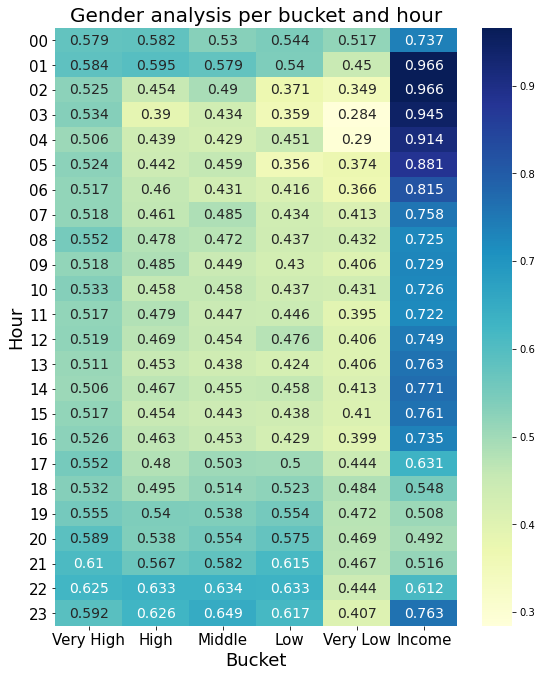

In [31]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()
  
plot_pivot_table(pivot_table_res)

In [32]:
# Ответы: 1, 3, 4, 5

## Task 6.

1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

Вопросы:

- 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
- 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
- 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
- 4) Денежные переводы имеют как минимум 3 явных минимума средних
- 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 


In [33]:
result_cat.tr_day = result_cat.tr_day.astype(int)
result_value_count = result_cat['mcc_code'].value_counts()
mcc_code_count_60 = result_value_count.loc[result_value_count > 60000]
mcc_code_count_60

6011    199281
6010    199266
5411    144202
4814    120694
4829     77936
Name: mcc_code, dtype: int64

In [34]:
filter_res = result_cat[result_cat.mcc_code.isin(mcc_code_count_60.index)]
filter_res

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,mcc_code+tr_type,tr_day,category,tr_hour
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,0,Very Low,10
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,6,Low,07
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,8,Very Low,07
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,11,Very Low,08
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030,11,Very Low,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998285,5205423,178 11:31:28,6010,7041,606397.26,NaN,NaN,Финансовые институты — снятие наличности вручную,Перевод на карту (с карты) через POS (из одног...,60107041,178,Income,11
998286,76606773,370 07:05:51,6010,7041,11319.42,014337,0.0,Финансовые институты — снятие наличности вручную,Перевод на карту (с карты) через POS (из одног...,60107041,370,Income,07
998287,15854896,109 13:41:04,6010,1000,-44117.20,NaN,1.0,Финансовые институты — снятие наличности вручную,Покупка.ТУ СБ РФ,60101000,109,High,13
998295,18654396,440 13:10:22,5411,6210,3897.56,931938,1.0,"Бакалейные магазины, супермаркеты",Возврат покупки.POS Зарубеж. ТУ,54116210,440,Income,13


In [35]:
# по дню и MCC-коду, получая средние значения суммы amount.
res_group = filter_res.groupby(['tr_day', 'mcc_code']).amount.mean()
res_group

tr_day  mcc_code
0       4814         -5631.316489
        4829       -214754.866266
        5411        -15462.567344
        6010         90390.672987
        6011        -55388.115175
                        ...      
456     4814         -5945.182500
        4829       -274049.766409
        5411        -15411.548528
        6010        109925.614017
        6011         18406.478780
Name: amount, Length: 2285, dtype: float64

In [36]:
res_group.unstack()

mcc_code,4814,4829,5411,6010,6011
tr_day,,,,,
0,-5631.316489,-214754.866266,-15462.567344,90390.672987,-55388.115175
1,-6375.587685,-158317.573750,-17770.243543,57658.709639,-38938.920557
2,-4280.502021,-311439.224857,-13197.019449,95514.734275,-71297.553542
3,-5683.344844,-267813.727273,-12584.078209,104576.823744,-49753.475536
4,-7071.730388,-351382.308480,-12376.649916,110324.802287,-54339.135414
...,...,...,...,...,...
452,-5084.165513,-215973.976904,-11805.167583,97106.748032,-57168.723509
453,-5684.247016,-190370.376239,-11932.826972,116383.905616,-63716.595522
454,-4786.101095,-177081.530909,-13345.274312,105039.577393,-28649.792782


In [37]:
tr_mcc_codes[tr_mcc_codes.mcc_code.isin([4814, 4829, 5411, 6010, 6011])]

,mcc_code,mcc_description
20,4814,"Звонки с использованием телефонов, считывающих..."
22,4829,Денежные переводы
56,5411,"Бакалейные магазины, супермаркеты"
123,6010,Финансовые институты — снятие наличности вручную
124,6011,Финансовые институты — снятие наличности автом...


In [38]:
# Ответы: 1, 2, 4